<a href="https://colab.research.google.com/github/Dimildizio/DS_course/blob/main/models/kmeans_compression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
from sklearn.cluster import KMeans
from PIL import Image
import matplotlib.pyplot as plt
from IPython import display
import os

In [48]:
image = Image.open("Peter.jpg")
new_width = 640
image = image.resize((new_width, int((new_width/image.width)*image.height)))

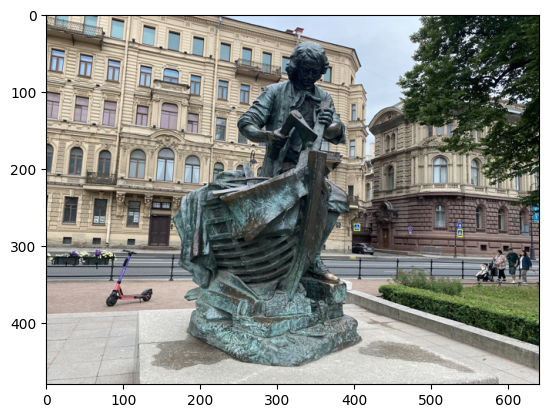

In [9]:
plt.imshow(image)

In [101]:
def plot_compare(orig, compressed):
    pics = (orig, compressed)
    names = ('Original', 'Compressed')
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))
    for n in range(2):
      ax[n].imshow(pics[n])
      ax[n].set_title(f'{names[n]} Image')
      ax[n].axis('off')
    plt.show()


def getsize(name):
  file_size = os.path.getsize(name)
  return round(file_size/1024/1024,2)


def savefile(image, name):
  compressed_image = Image.fromarray((image * 255).astype(np.uint8))
  filename = f'{name[:-4]}_compressed.png'
  compressed_image.save(filename)
  return filename


def compare_size(image_path, compressed_image_path):
  for name, path in zip(('Original', 'Compressed'), (image_path, compressed_image_path)):
    print(f"{name} Image File Size: {getsize(path)} mb")


def apply_gamma_correction(image_np, gamma=2.2):
    return np.power(image_np, gamma)


def reverse_gamma_correction(image_np, gamma=2.2):
    return np.power(image_np, 1/gamma)


def calc_kmeans(image_np, n):
  pxls = image_np.reshape(-1, 3)

  kmeans = KMeans(n_clusters=n, n_init='auto')
  kmeans.fit(pxls)

  comp_pxl = kmeans.cluster_centers_[kmeans.labels_]
  comp_img_np = comp_pxl.reshape(image_np.shape)
  return comp_img_np


def save_n_compare(image_np, comp_img_np, filename='Peter.jpg'):
  plot_compare(image_np, comp_img_np)
  compressed_filename = savefile(comp_img_np, filename)
  compare_size(filename, compressed_filename)


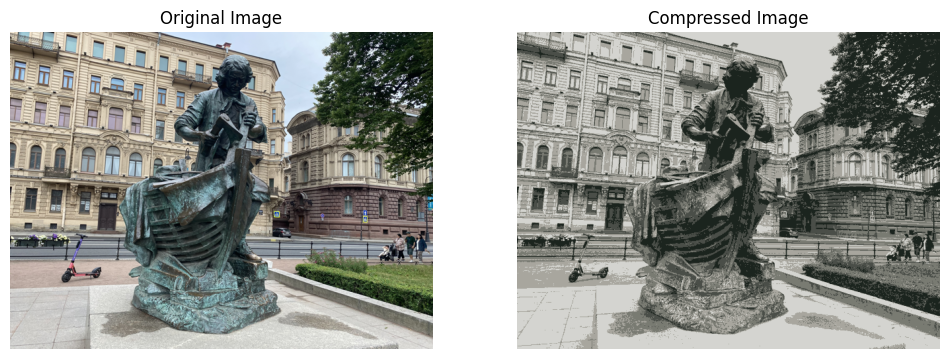

Original Image File Size: 4.31 mb
Compressed Image File Size: 0.09 mb
Clusters number: 5


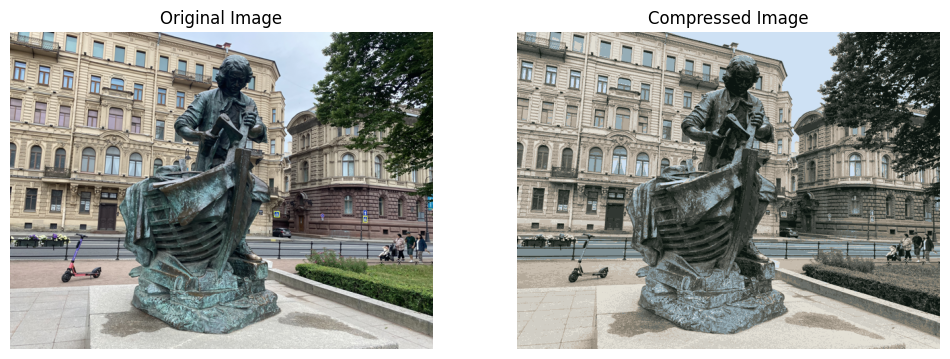

Original Image File Size: 4.31 mb
Compressed Image File Size: 0.19 mb
Clusters number: 15


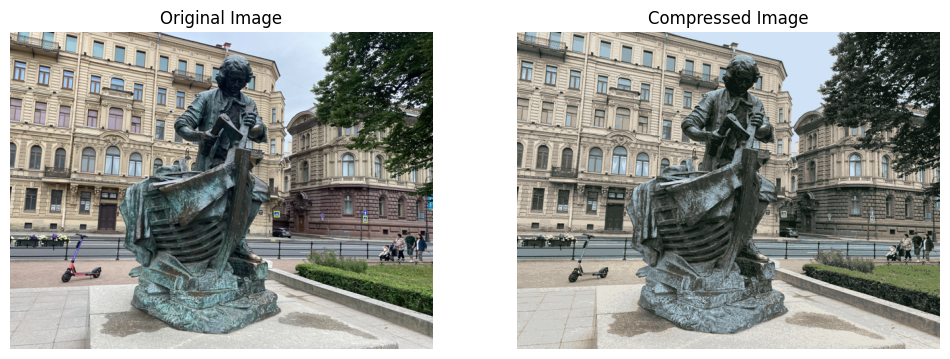

Original Image File Size: 4.31 mb
Compressed Image File Size: 0.21 mb
Clusters number: 20


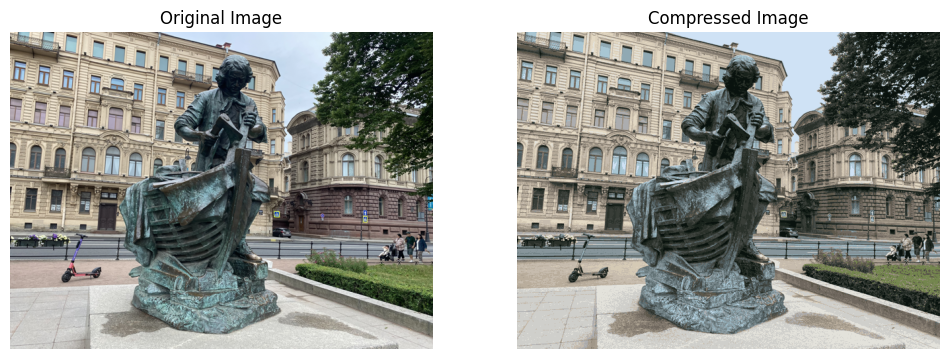

Original Image File Size: 4.31 mb
Compressed Image File Size: 0.23 mb
Clusters number: 25


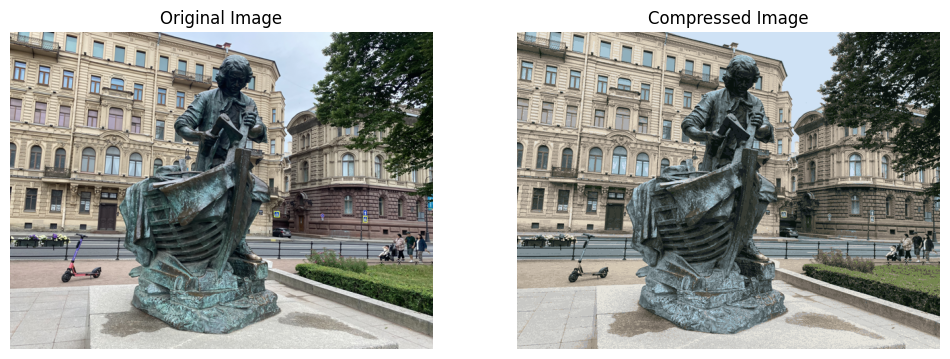

Original Image File Size: 4.31 mb
Compressed Image File Size: 0.25 mb
Clusters number: 30


In [107]:
image_np = np.array(image) / 255.0
#image_np = apply_gamma_correction(image_np)

for clusters in (5, 15, 20, 25, 30):
  comp_img_np = calc_kmeans(image_np, clusters)
  #comp_img_np = reverse_gamma_correction(comp_img_np)
  save_n_compare(image_np, comp_img_np)
  print('Clusters number:', clusters)